In [2]:
pip install pylops

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pylops

from matplotlib import pyplot as plt
import os

from PIL import Image

In [11]:
#use this function to save jpg file
def numpy_to_jpg(data, filename):
    img_name = filename +".jpg"
    matplotlib.image.imsave(img_name, data)
    print(filename + " was saved")

In [6]:
filename = '0_IPHONE-SE_F'

img = Image.open( filename + '.jpg' )
data = np.array( img, dtype='float32' )

data = data[::5, ::5, 0]
Nz, Nx = data.shape

nh = [15, 25]
hz = np.exp(-0.1 * np.linspace(-(nh[0] // 2), nh[0] // 2, nh[0]) ** 2)
hx = np.exp(-0.03 * np.linspace(-(nh[1] // 2), nh[1] // 2, nh[1]) ** 2)
hz /= np.trapz(hz)  # normalize the integral to 1
hx /= np.trapz(hx)  # normalize the integral to 1
h = hz[:, np.newaxis] * hx[np.newaxis, :]

Cop = pylops.signalprocessing.Convolve2D(dims = (Nz, Nx), h=h, offset=(nh[0] // 2, nh[1] // 2), dtype="float32", N = Nz*Nx)

print(Nz, Nx)


410 308


In [8]:
imblur = data

imblur = imblur.ravel()

imdeblur = pylops.optimization.leastsquares.NormalEquationsInversion(
    Cop, None, imblur, maxiter=50
)


Wop = pylops.signalprocessing.DWT2D((Nz, Nx), wavelet="haar", level=3)
Dop = [
    pylops.FirstDerivative((Nz, Nx), edge=False),
    pylops.FirstDerivative((Nz, Nx), edge=False),
]
DWop = Dop + [
    Wop,
]

imdeblurfista = pylops.optimization.sparsity.FISTA(
    Cop * Wop.H, imblur, eps=1e-1, niter=100
)[0]
imdeblurfista = Wop.H * imdeblurfista



# Reshape images
imblur = imblur.reshape((Nz, Nx))
imdeblur = imdeblur.reshape((Nz, Nx))
imdeblurfista = imdeblurfista.reshape((Nz, Nx))


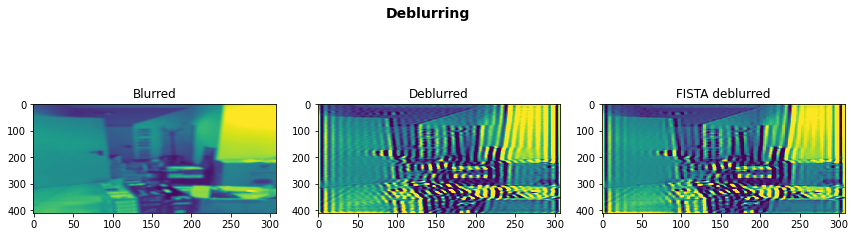

In [10]:
# sphinx_gallery_thumbnail_number = 2
# sphinx_gallery_thumbnail_number = 2
fig = plt.figure(figsize=(12, 9))
fig.suptitle("Deblurring", fontsize=14, fontweight="bold", y=0.95)
ax1 = plt.subplot2grid((4, 3), (0, 0))
ax2 = plt.subplot2grid((4, 3), (0, 1))
ax3 = plt.subplot2grid((4, 3), (0, 2))




ax1.imshow(imblur, cmap="viridis", vmin=0, vmax=250)
ax1.axis("tight")
ax1.set_title("Blurred")
ax2.imshow(imdeblur, cmap="viridis", vmin=0, vmax=250)
ax2.axis("tight")
ax2.set_title("Deblurred")
ax3.imshow(imdeblurfista, cmap="viridis", vmin=0, vmax=250)
ax3.axis("tight")
ax3.set_title("FISTA deblurred")


plt.tight_layout()
plt.subplots_adjust(top=0.8)